<a href="https://colab.research.google.com/github/wellagainst/Coding-Projects/blob/main/Geog573_GengkuiLiu_Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task 1: Convert the CityPop.csv file to a JSON file, save as CityPop.json.

In [4]:
import pandas as pd
cityPop=pd.read_csv("CityPop.csv")
cityPop.head()

,id,latitude,longitude,city,label,yr1970,yr1975,yr1980,yr1985,yr1990,yr1995,yr2000,yr2005,yr2010
0,1,35.683208,139.808945,Tokyo,Tokyo,23.30,26.61,28.55,30.30,32.53,33.59,34.45,35.62,36.67
1,2,28.608280,77.200813,New_Delhi,New Delhi,3.53,4.43,5.56,7.33,9.73,12.41,15.73,19.49,22.16
2,3,-23.562839,-46.654640,Sao_Paulo,Sao Paulo,7.62,9.61,12.09,13.39,14.78,15.95,17.10,18.65,20.26
3,4,18.930130,72.830093,Mumbai,Mumbai,5.81,7.08,8.66,10.34,12.31,14.11,16.09,18.21,20.04
4,5,19.431959,-99.133163,Mexico_City,Mexico City,8.77,10.69,13.01,14.11,15.31,16.81,18.02,18.73,19.46


In [11]:
cityPop_list=[]
for row in cityPop.itertuples(index=True):
  city={}
  city["id"]=getattr(row, "id")
  city["latitude"]=getattr(row, "latitude")
  city["longitude"]=getattr(row, "longitude")
  city["city"]=getattr(row, "city")
  city['label'] =  getattr(row, "label")# cityname
  city['yr1970'] = getattr(row, "yr1970")# yr1970
  city['yr1975'] = getattr(row, "yr1975") # yr1975
  city['yr1980'] = getattr(row, "yr1980") # yr1980
  city['yr1985'] = getattr(row, "yr1985") # yr1985
  city['yr1990'] = getattr(row, "yr1990") # yr1990
  city['yr1995'] = getattr(row, "yr1995") # yr1995
  city['yr2000'] = getattr(row, "yr2000") # yr2000
  city['yr2005'] = getattr(row, "yr2005") # yr2005
  city['yr2010'] = getattr(row, "yr2010") # yr2010

  cityPop_list.append(city)
print(cityPop_list)

[{'id': 1, 'latitude': 35.6832085, 'longitude': 139.8089447, 'city': 'Tokyo', 'label': 'Tokyo', 'yr1970': 23.3, 'yr1975': 26.61, 'yr1980': 28.55, 'yr1985': 30.3, 'yr1990': 32.53, 'yr1995': 33.59, 'yr2000': 34.45, 'yr2005': 35.62, 'yr2010': 36.67}, {'id': 2, 'latitude': 28.6082802, 'longitude': 77.2008133, 'city': 'New_Delhi', 'label': 'New Delhi', 'yr1970': 3.53, 'yr1975': 4.43, 'yr1980': 5.56, 'yr1985': 7.33, 'yr1990': 9.73, 'yr1995': 12.41, 'yr2000': 15.73, 'yr2005': 19.49, 'yr2010': 22.16}, {'id': 3, 'latitude': -23.5628395, 'longitude': -46.6546402, 'city': 'Sao_Paulo', 'label': 'Sao Paulo', 'yr1970': 7.62, 'yr1975': 9.61, 'yr1980': 12.09, 'yr1985': 13.39, 'yr1990': 14.78, 'yr1995': 15.95, 'yr2000': 17.1, 'yr2005': 18.65, 'yr2010': 20.26}, {'id': 4, 'latitude': 18.93013, 'longitude': 72.8300934, 'city': 'Mumbai', 'label': 'Mumbai', 'yr1970': 5.81, 'yr1975': 7.08, 'yr1980': 8.66, 'yr1985': 10.34, 'yr1990': 12.31, 'yr1995': 14.11, 'yr2000': 16.09, 'yr2005': 18.21, 'yr2010': 20.04}, {

In [12]:
import json
cityPopJson=json.dumps(cityPop_list)
print(type(cityPopJson)) 

<class 'str'>


In [13]:
## output: write a json file
with open('CityPop.json','w') as  fw:
    fw.write(cityPopJson)
print ('Task 1 done.')

Task 1 done.


Task 2: Convert the CityPop.json file to a GeoJSON file, save as CityPop_geojson.json.

In [20]:
def jsonToGeojson(items):
  import json
  return json.dumps({
      "type": "FeatureCollection",
      "features": [{"type": "Feature",
                    "geometry": { "type": "Point", "coordinates": [feature['longitude'], feature['latitude']]},
                    "properties": { key: value
                                   for key, value in feature.items()
                                     if key not in ('latitude', 'longitude') }
                    }
                   for feature in json.loads(items)
                   ]
  })
                            

In [27]:
cityPopGeojson=jsonToGeojson(cityPopJson)
print(cityPopGeojson)  

{"type": "FeatureCollection", "features": [{"type": "Feature", "geometry": {"type": "Point", "coordinates": [139.8089447, 35.6832085]}, "properties": {"id": 1, "city": "Tokyo", "label": "Tokyo", "yr1970": 23.3, "yr1975": 26.61, "yr1980": 28.55, "yr1985": 30.3, "yr1990": 32.53, "yr1995": 33.59, "yr2000": 34.45, "yr2005": 35.62, "yr2010": 36.67}}, {"type": "Feature", "geometry": {"type": "Point", "coordinates": [77.2008133, 28.6082802]}, "properties": {"id": 2, "city": "New_Delhi", "label": "New Delhi", "yr1970": 3.53, "yr1975": 4.43, "yr1980": 5.56, "yr1985": 7.33, "yr1990": 9.73, "yr1995": 12.41, "yr2000": 15.73, "yr2005": 19.49, "yr2010": 22.16}}, {"type": "Feature", "geometry": {"type": "Point", "coordinates": [-46.6546402, -23.5628395]}, "properties": {"id": 3, "city": "Sao_Paulo", "label": "Sao Paulo", "yr1970": 7.62, "yr1975": 9.61, "yr1980": 12.09, "yr1985": 13.39, "yr1990": 14.78, "yr1995": 15.95, "yr2000": 17.1, "yr2005": 18.65, "yr2010": 20.26}}, {"type": "Feature", "geometry"

In [28]:
## output: write a json file
with open('CityPop_geojson.json','w') as  fw:
    fw.write(cityPopGeojson)
print ('Task 2 done.')

Task 2 done.


Task 3: Convert the CityPop_geojson.json file to a Shp file, save as CityPop.shp.

In [30]:
% pip install geopandas
import geopandas as gpd
cityPopGpd=gpd.read_file("CityPop_geojson.json")
cityPopGpd.head()

     |████████████████████████████████| 1.0 MB 26.8 MB/s 
     |████████████████████████████████| 15.4 MB 48.9 MB/s 
     |████████████████████████████████| 6.3 MB 48.3 MB/s 


,id,city,label,yr1970,yr1975,yr1980,yr1985,yr1990,yr1995,yr2000,yr2005,yr2010,geometry
0,1,Tokyo,Tokyo,23.30,26.61,28.55,30.30,32.53,33.59,34.45,35.62,36.67,POINT (139.80894 35.68321)
1,2,New_Delhi,New Delhi,3.53,4.43,5.56,7.33,9.73,12.41,15.73,19.49,22.16,POINT (77.20081 28.60828)
2,3,Sao_Paulo,Sao Paulo,7.62,9.61,12.09,13.39,14.78,15.95,17.10,18.65,20.26,POINT (-46.65464 -23.56284)
3,4,Mumbai,Mumbai,5.81,7.08,8.66,10.34,12.31,14.11,16.09,18.21,20.04,POINT (72.83009 18.93013)
4,5,Mexico_City,Mexico City,8.77,10.69,13.01,14.11,15.31,16.81,18.02,18.73,19.46,POINT (-99.13316 19.43196)


In [31]:
cityPopGpd.to_file("CityPop.shp")

Task 4: Load the CityPop.shp file and create a simple map with world map as basemap. 

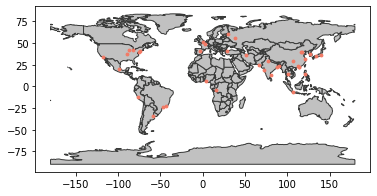

In [36]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres')) # read world data
base = world.plot(color='#c1c1c1', edgecolor='#393a39') # base map
cityPopGpd.plot(ax=base, marker='o', color='#f37a65', markersize=8) # plot cities on the map